# Monte Carlo Methods Exercises

**NOTICE:**
1. You are allowed to work in groups of up to three people but **have to document** your group's\
 members in the top cell of your notebook.
2. **Comment your code**, explain what you do (refer to the slides). It will help you understand the topics\
 and help me understand your thinking progress. Quality of comments will be graded. 
3. **Discuss** and analyze your results, **write-down your learnings**. These exercises are no programming\
 exercises it is about learning and getting a touch for these methods. Such questions might be asked in the\
 final exams. 
 4. Feel free to **experiment** with these methods. Change parameters think about improvements, write down\
 what you learned. This is not only about collecting points for the final grade, it is about understanding\
  the methods. 

In [ ]:
# If you run on google-colab you have to install this package whenever you start a kernel
!pip install gymnasium

In [215]:
#@title **Provided Code:** ``visualize_taxi_policy()`` and ``test_taxi_policy()`` function. 

from IPython import display
import matplotlib.pyplot as plt 
import time
import numpy as np 

def visualize_taxi_policy(env, Q, delay=0.175):
    ''' 
        Visualize a taxi policy. 
        env - Taxi-v3 environment.
        Q - a Q-table with Q[i, k] giving the action-value for action k taken in state i.
    '''
    s, _ = env.reset()
    plt.imshow(env.render())

    while True:
        if isinstance(Q, np.ndarray):
            a = np.argmax(Q[s])
        elif isinstance(Q, tf.keras.Sequential):
            q = Q.predict([s], verbose=0)
            a = np.argmax(q)
        else:
            raise Exception("Q is expected to be either a np.array or a tf.keras.Sequential type")
        s,_,terminated,truncated,_ = env.step(a)
        plt.imshow(env.render())
        plt.show()
        display.clear_output(wait=True)
        time.sleep(delay)

        if terminated or truncated:
            break


def test_taxi_policy(env, Q):
    ''' 
        Test a taxi policy. 
        env - Taxi-v3 environment.
        Q - a Q-table with Q[i, k] giving the action-value for action k taken in state i.
        returns: success-rate, average reward per step
    '''

    success = 0
    rewards = []

    for it in range(100):
        s, _ = env.reset()
        while True:
            if isinstance(Q, np.ndarray):
                a = np.argmax(Q[s])
            elif isinstance(Q, tf.keras.Sequential):
                q = Q.predict([s], verbose=0)
                a = np.argmax(q)
            else:
                raise Exception("Q is expected to be either a np.array or a tf.keras.Sequential type")

            s,r,terminated,truncated,_ = env.step(a)
            rewards.append(r)
            if terminated:
                success += 1
            if terminated or truncated:
                break
    return success/100, np.mean(rewards)


### Exercise 1 - Q-Learning

**Summary:** In this exercise we will use the ``Taxi-v3`` environment to implement and test   
the Q-learning algorithm. We will use the same algorithm later to extend it with neural nets  
to Deep Q-learning (DQN) which is today used in various state-of-the-art AI models. 

**So, make sure you understand it deeply!**

**Hints:** 
* Use ```env.action_space.n``` to find the number of possible actions.
* Use ```env.observation_space.n``` to find the number of possible states.
* You can sample a random action using ```env.action_space.sample()```.
* You can use ```np.argmax(...)``` with appropriate indexing into the ```Q```   
array to get the index with the highest value (e.g.: for $max_a Q(S_{t+1}, a)$). 

**Provided Code:** The cells below contains code to initialize the ```Taxi-v3``` environment.  
Use the ```test_taxi_policy(env, Q)``` method and ```visualize_taxi_policy(env, Q)``` with your   
Q-table as argument to test and visualize the greedy policy derived from a Q table. 


**Your Tasks in this exercise:**
1. Implement the Q-learning algorithm
2. Test your implementation using using the ```test_taxi_policy(env, Q)```
3. Answer and discuss:
    * Why is Q-learning an off-policy algorithm?
    * What is the role of the epsilon-greedy strategy in Q-learning?
    * Does the Q-learning algorithm converge without reducing the exploration rate over time?
    


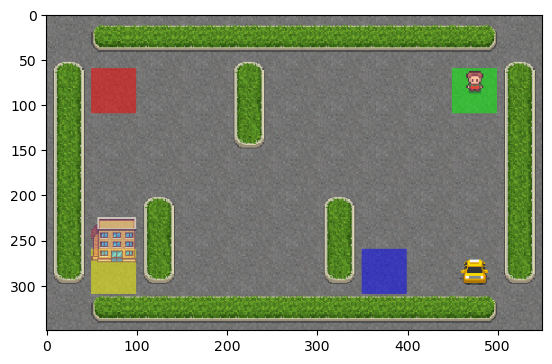

In [216]:
import gymnasium as gym
env = gym.make('Taxi-v3', render_mode='rgb_array')

s_t = env.reset()
plt.imshow(env.render())

### Exercise 2 - Sarsa


In this exercise we will use the ``Taxi-v3`` environment to implement and test   
the Sarsa algorithm. 


**Hints:** 
* Use ```env.action_space.n``` to find the number of possible actions.
* Use ```env.observation_space.n``` to find the number of possible states.
* You can sample a random action using ```env.action_space.sample()```.
* You can use ```np.argmax(...)``` with appropriate indexing into the ```Q```   
array to get the index with the highest value (e.g.: for $max_a Q(S_{t+1}, a)$). 



**Provided Code:** The cells below contains code to initialize the ```Taxi-v3``` environment.  
Use the ```test_taxi_policy(env, Q)``` method and ```visualize_taxi_policy(env, Q)``` with your   
Q-table as argument to test and visualize the greedy policy derived from a Q table. 


**Your Tasks in this exercise:**
1. Implement the Sarsa algorithm
    * Implement a flag that activates exploration decay (reducing the learning rate)   
    over time. 
2. Test your implementation using using the ```test_taxi_policy(env, Q)```
3. Compare the convergence of the algorithm with exploration decay and without
4. Answer and discuss:
    * Why is Sarsa an on-policy algorithm?
    * What is the impact of exploration decay in Sarsa?

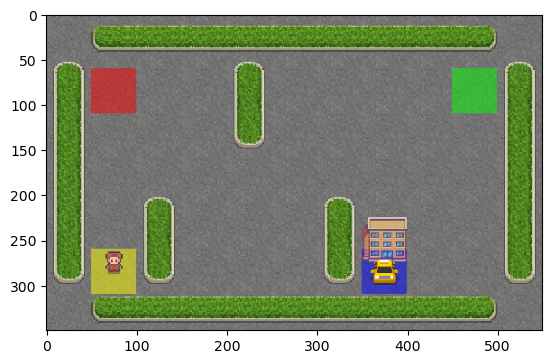

In [231]:
import gymnasium as gym
env = gym.make('Taxi-v3', render_mode='rgb_array')

s_t = env.reset()
plt.imshow(env.render())

### Exercise 3 - Deep Sample-Averaging (single State, single Action)

Sample-averaging is an iterative way to estimate the mean (such as the mean of    
rewards) using the update rule $Q_{n+1} \leftarrow Q_n + \alpha [r_{n} - Q_n]$.

In this exercise we will use a neural net to perform sample-averaging.   
Once you understand how we employ a neural net to do so (and how it  
*bootstraps* in particular) moving to deep temporal difference learning  
will be easy. 


**Provided Code:** The cells below give you a sample implementation of   
the sample-averaging and the environment we use (it's just a one-armed bandit).   
Use it as your skeleton for your deep sample-averaging implementation. To save   
some time, I have also provided you with code that initializes and prepares a    
neural net for regression using keras (you should know how to do this at this)
point. 

**Hints:**
* ```model.predict(np.array([s_t]))``` - predicts the mean reward of state s_t
* ```model.fit(xs, ys)``` - fits your neural network for a batch of states    
(xs) and labels (ys)
* You can convert a list x to a np.array using ```np.array([x])```


**Your Tasks in this exercise:**
1. Implement the Deep Sample-Averaging


In [236]:
import numpy as np 

class SampleAveragingEnv:
    def __init__(self, num_states = 3, num_actions=5):
        self._max_steps = 100
        self._step = 0

        self._mus = 10 * np.random.randn(num_states, num_actions)
        self._sigmas = np.random.randn(num_states, num_actions)
        self._states = np.arange(num_states)
        self._actions = np.arange(num_actions)

    def __compute_reward__(self, state, action):
        return self._mus[state,action] + self._sigmas[state,action] * np.random.randn()

    def action_space(self):
        return self._actions

    def state_space(self):
        return self._states

    def step(self, action):
        self._step += 1

        terminated = False
        truncated = self._step >= self._max_steps
        reward = self.__compute_reward__(self._state, action)


        # Transition to random state
        #
        self._state = np.random.choice(self._states)

        return self._state,reward, terminated, truncated
    
    def reset(self):
        # Transition to random state
        #
        self._step = 0
        self._state = np.random.choice(self._states)
        return self._state
    
    def print_means(self):
        for state in self._states:
            for action in self._actions:
                print("Mean(S-%d, A-%d): %f" % (state, action, self._mus[state, action]))

    def get_means(self):
        return self._mus

#### Use the code below as a reference, change the required parts with a neural net. 

In [237]:
# Average sampling using a simple environment with a single state and a 
# single action. 
#
env = SampleAveragingEnv(num_states = 1, num_actions = 1)
M = np.random.randn()
alpha = 0.01

for e in range(1000):
    s_t = env.reset()
    while True:
        a_t = 0 # only one action, boring ...
        s_tplus1, r_tplus1, terminated, truncated = env.step(a_t)

        # By observing r_tplus1 we get one piece of real information
        # that moves our estimate more towards the real mean of 
        # the reward distribution.
        #
        M = M + alpha * (r_tplus1 - M)
        if truncated or terminated:
            break

        s_t = s_tplus1

print('Estimated mean: %f' % M)
env.print_means()

Estimated mean: -12.371375
Mean(S-0, A-0): -12.394787


In [238]:
# This will help you initialize your neural net. 
#
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt)

### Exercise 4 - Deep Average-Sampling (multiple States, multiple Actions)


In this exercise you will extend your previous solution to work with multiple actions.


**Provided Code:** Use your implementation from Exercise 3 as a start. The cell below
initializes a neural net with 4 outputs for you. 

**Hints:**
At this point you might need some more control over your training. See the code sample   
below how we can manually compute gradients and apply them for a training step using tf.    

```python 
...
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
with tf.GradientTape () as tape:
    tape.watch(model.trainable_weights)
    # Do your stuff to compute the loss. 
    #
    loss = ...
    # Compute gradients using tf. 
    #
    grads = tape.gradient(loss, model.trainable_weights)
    # Apply a step of optimization to network weights. 
    #
    opt.apply_gradients(zip(grads, model.trainable_weights))
```

**Also Notice:** In each time-step you will have to decide for one action, this means the environment   
will give you only a single reward (the reward for the taken action). For training the net, we want to   
**IGNORE** the action we did not take (we have no useful information at this point).

We can accomplish this by masking out the actions we did not take, i.e.: multiply them element-wise   
with a one-hot encoded vector indicating the selected action:    
```mask = tf.one_hot(a_t, depth=num_actions, on_value=1, off_value=0, dtype=tf.float32)```




**Your Tasks in this exercise:**
1. Implement the Deep Sample-Averaging for **two states with four actions per state**
2. Explain how the masking affects the gradients of the neural net   
(why does it work, what does it accomplish)?
3. Explain how you could make the training of the net more stable. 




In [247]:
# This will help you initialize your neural net. 
#
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential

num_actions = 4
model = Sequential()
model.add(Input(shape=(1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_actions, activation='linear'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

env = SampleAveragingEnv(num_states = 2, num_actions = num_actions)
alpha = 0.01
env.print_means()



Mean(S-0, A-0): 6.210664
Mean(S-0, A-1): -6.887016
Mean(S-0, A-2): -2.720971
Mean(S-0, A-3): -1.809591
Mean(S-1, A-0): -4.647690
Mean(S-1, A-1): -0.240632
Mean(S-1, A-2): 0.776077
Mean(S-1, A-3): -14.998036


### Exercise 5 - Double Deep-Q Learning

In this exercise I provide you with my implementation of Double DQN. Use the code to solve the CartPole-V1 environment  
(average reward of 500). Read through the code and try to match your theoretical knowledge from the lecture with the   
implementation. 


**Provided Code:** 
The cell below gives you a simple implementation of a ```ReplayBuffer```, an implementation of   
```soft-updates``` and a straight forward implementation of ```Double DQN```. 


**Your Tasks in this exercise:**
1. Read through the code and try to understand what it does. 
2. Solve the CartPole-v1 environment. 
3. Explain which techniques were applied and why these techniques are used. Also explain what is    
different from theory (and why)?

In [13]:
import numpy as np


class ReplayBuffer:
    ''' This implements a simple version of a replay memory.'''

    def __init__(self, state_shape, action_shape, buffer_size=5000):
        self._state_t = np.zeros((buffer_size, *state_shape))
        self._state_tplus1 = np.zeros((buffer_size, *state_shape))
        self._action_t = np.zeros((buffer_size, *action_shape))
        self._reward_tplus1 = np.zeros((buffer_size, 1))
        self._is_nonterminal = np.zeros((buffer_size, 1))
        self._is_greedy_action = np.zeros((buffer_size, 1))
        self._cur_idx = 0
        self._len = 0
        self._buffer_size = buffer_size
        self._is_filled = False

    def store_transition(self, s_t, a_t, r_tplus1, s_tplus1, is_nonterminal, is_greedy_action):
        self._state_t[self._cur_idx,:] = s_t
        self._state_tplus1[self._cur_idx,:] = s_tplus1
        self._action_t[self._cur_idx,:] = a_t
        self._reward_tplus1[self._cur_idx,:] = r_tplus1
        self._is_nonterminal[self._cur_idx,:] = is_nonterminal
        self._is_greedy_action[self._cur_idx,:] = is_greedy_action

        self._cur_idx += 1
        if self._cur_idx >= self._buffer_size:
            self._cur_idx = 0
            self._len = self._buffer_size
            self._is_filled = True


    def start_epoch(self, batch_size, max_samples=None):
        if max_samples is None:
            max_samples = self.len()

        if max_samples > self.len():
            max_samples = self.len()

        self._batch_idx = 0
        self._batch_size = batch_size
        self._batch_max_idx = np.floor(max_samples / self._batch_size)-1

        self._batch_indices = np.arange(self.len())
        np.random.shuffle(self._batch_indices)

    def has_batch(self):
        return self._batch_idx < self._batch_max_idx

    def get_minibatch(self):
        indices = self._batch_indices[self._batch_idx*self._batch_size: self._batch_idx*self._batch_size+self._batch_size]
        self._batch_idx += 1
        return self._state_t[indices, :], self._action_t[indices, :], self._reward_tplus1[indices, :], self._state_tplus1[indices, :], self._is_nonterminal[indices,:]
    
    def sample_minibatch(self, batch_size):
        indices = np.random.choice(np.arange(self.len()), batch_size, replace=False)
        return self._state_t[indices, :], self._action_t[indices, :], self._reward_tplus1[indices], self._state_tplus1[indices, :], self._is_nonterminal[indices,:]
    
    def len(self):
        if self._is_filled:
            return self._buffer_size
        else:
            return self._cur_idx
        
    def stats(self):
        fill_prct = (self.len() * 100) / self._buffer_size
        nonterminal_prct = (np.sum(self._is_nonterminal)  * 100) / self.len()
        terminal_prct = 100 - nonterminal_prct
        greedy_action_prct = (np.sum(self._is_greedy_action[0:self.len()])) * 100 / self.len()
        exploratory_action_prct = 100 - greedy_action_prct

        avg_reward = np.mean(self._reward_tplus1[0:self.len()])
        std_reward = np.std(self._reward_tplus1[0:self.len()])

        return "[#trans: %d - %%fil: %.01f - %%terminal: %.01f - %%exp-actions: %.01f]" \
                % (self.len(), fill_prct, terminal_prct, exploratory_action_prct)
    


def update_target_weights(net_A, net_B, tau=0.001):
    ''' Performs a soft update using the weights of net_A updating net_B
        via linear interpolation.
    '''

    for i in range(len(net_A.layers)):

        layer_weights_list_A = net_A.layers[i].get_weights()
        layer_weights_list_B = net_B.layers[i].get_weights()

        new_weights = []
        for (w_src, w_target) in zip(layer_weights_list_A, layer_weights_list_B):
            w_target = w_src * tau + (1.0-tau) * w_target
            new_weights.append(w_target)

        net_B.layers[i].set_weights(new_weights)



import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

def create_net(input_dim, action_dim):
    net = Sequential()
    net.add(Input(shape=(input_dim)))
    net.add(Dense(32, activation='relu'))
    net.add(Dense(32, activation='relu'))
    net.add(Dense(32, activation='relu'))
    net.add(Dense(action_dim, activation='linear'))

    net.compile()
    
    return net



In [14]:
# My implementation of Double DQN for the CartPole-v1 environment. 
#
import gymnasium as gym
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential

env = gym.make('CartPole-v1', render_mode='rgb_array')
solved_reward = 500

# Parameters: Feel free to change.
#
gamma = 0.99
eps = 0.9
minibatch_size = 32
buf_capacity = 10000

# Initialize the memory buffer.,
#
buf = ReplayBuffer((4,), (1,), buffer_size=buf_capacity)


# Initializes neural nets. 
# 
q_net_target = create_net(4,2)
q_net_second = create_net(4, 2)
q_net_second.set_weights(q_net_target.get_weights())


opt = tf.keras.optimizers.Adam(learning_rate=2.5e-4)
solved = False

steps_avg = []
for it in range(1, 2001):

    if solved:
        break
    
    # Update epsilon. 
    #
    if it % 25 == 0:
        eps = eps - 0.05
        
    if eps < 0.1:
        eps = 0.1
        
    s_t, info = env.reset()
    i = 0
    while True:
        i += 1
        # Epsilon-greedy trajectory generation. 
        #
        if np.random.rand() <= eps:
            a_t = env.action_space.sample()
            is_greedy_action = False
        else:
            q_values = q_net_target(np.array([s_t]))
            a_t = tf.argmax(q_values, axis=1).numpy()[0]
            is_greedy_action = True
        
        s_tplus1, r_tplus1, terminated, truncated, info = env.step(a_t)
        buf.store_transition(s_t, a_t, r_tplus1, s_tplus1, not terminated, is_greedy_action)

        # Print a . on truncated a o on success. 
        #
        if terminated or truncated:
            steps_avg.append(i)
            if terminated:
                print(".", end='')
            if truncated:
                print("o", end='')
            if it % 25 == 0:
                print(' (%d - eps: %f - avg-steps: %d - replay stats: %s)' % (it, eps, np.mean(steps_avg), buf.stats()))
                steps_avg = []
            break
        
        s_t = s_tplus1

    # After 10 episodes train on the entire replay buffer. 
    #
    if it % 10 == 0:

        if buf.len() >= minibatch_size:
            buf.start_epoch(batch_size=minibatch_size)
            while buf.has_batch():
                bs_t, ba_t, br_tplus1, b_stplus1, b_isnonterminal = buf.get_minibatch()

                # Double DQN: Predict the returns for all actions in next state (s_t+1) using the second net. 
                # And use this information to select the best (greedy) action. 
                #
                q_next = tf.constant(q_net_second((tf.constant(b_stplus1)), training=False))
                best_action_mask = tf.one_hot(tf.argmax(q_next, axis=1), depth=2)
                
                # Predict action-values of next state and all actions using the target net use only
                # the action selected by using the second net. 
                #
                q_next_target = tf.constant(q_net_target((tf.constant(b_stplus1)), training=False))
                q_next_target = q_next_target * best_action_mask
                q_next_target  = tf.reduce_sum(q_next_target, axis=1)

                # Reshape from row vector to a column vector for the next multiplication
                # 
                q_next_target = tf.reshape(q_next_target, (minibatch_size, 1))
                
                # Compute targets, i.e.: y_j
                #
                target = br_tplus1 + gamma * q_next_target * b_isnonterminal

                with tf.GradientTape() as tape:

                    tape.watch(q_net_target.trainable_weights)

                    # Predict all action-values using neural net for each action.
                    #
                    q_cur = tf.convert_to_tensor(q_net_target((bs_t)), dtype=tf.float32)
                
                    # We only care about the taken action a_t.
                    #
                    mask = tf.one_hot(ba_t.ravel(), depth=2, on_value=1, off_value=0, dtype=tf.float32)

                    # Compute loss, multiply by mask to make gradients of non-taken actions 0. 
                    #
                    q_predicted = tf.reduce_sum(q_cur * mask, axis=1)
                    # Convert to column vector
                    #
                    q_predicted = tf.reshape(q_predicted, (minibatch_size, 1))
                    loss = tf.reduce_mean((q_predicted - target) * (q_predicted - target))

                    # Train net. 
                    #
                    grads = tape.gradient(loss, q_net_target.trainable_weights)
                    opt.apply_gradients(zip(grads, q_net_target.trainable_weights))
                
                    # Soft update of network parameters. 
                    #
                    update_target_weights(q_net_target, q_net_second, tau=0.01)


    # Run episode using greddy policy from q_net and print total reward
    #
    if it % 25 == 0:
        r_sum = 0
        steps_avg = []
        for i in range(25):
            s_t,_ = env.reset()
           
            steps = 0
            while True:
                steps = steps + 1
                q_values = q_net_target(np.array([s_t]))
                a_t = tf.argmax(q_values, axis=1).numpy()[0]
                s_tplus1, r_tplus1, terminated, truncated,_ = env.step(a_t)
                r_sum = r_sum + r_tplus1

                if terminated or truncated:
                    steps_avg.append(steps)
                    break

                s_t = s_tplus1
        print('---------------------------------------------------------------------')
        print("Avg-Reward: %f - Avg-Steps: %.01f" % (r_sum / 25, np.mean(steps_avg)))
        print('---------------------------------------------------------------------')
        if r_sum / 25 == 500:
            print("==== Solved! ====")
            solved = True


......................... (25 - eps: 0.850000 - avg-steps: 23 - replay stats: [#trans: 582 - %fil: 5.8 - %terminal: 4.3 - %exp-actions: 90.7])
---------------------------------------------------------------------
Avg-Reward: 12.160000 - Avg-Steps: 12.2
---------------------------------------------------------------------
......................... (50 - eps: 0.800000 - avg-steps: 16 - replay stats: [#trans: 1099 - %fil: 11.0 - %terminal: 4.5 - %exp-actions: 87.0])
---------------------------------------------------------------------
Avg-Reward: 9.120000 - Avg-Steps: 9.1
---------------------------------------------------------------------
......................... (75 - eps: 0.750000 - avg-steps: 16 - replay stats: [#trans: 1677 - %fil: 16.8 - %terminal: 4.5 - %exp-actions: 84.8])
---------------------------------------------------------------------
Avg-Reward: 9.480000 - Avg-Steps: 9.5
---------------------------------------------------------------------
......................... (100 